<a href="https://colab.research.google.com/github/AlexAbrudan/student_scores_vs_hours_of_study/blob/main/student_scores_and_study_times.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')


!pip install -q kaggle
from google.colab import files

In [13]:
#do not run
files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle.json': b'{"username":"alexabrudan","key":"f1d274186f775d0ee9dba2c511e3af16"}'}

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [4]:
! kaggle datasets download -d himanshunakrani/student-study-hours

  0% 0.00/276 [00:00<?, ?B/s]
100% 276/276 [00:00<00:00, 281kB/s]


In [5]:
! mkdir data


In [6]:
! kaggle datasets download -d himanshunakrani/student-study-hours

student-study-hours.zip: Skipping, found more recently modified local copy (use --force to force download)


In [7]:
!unzip student-study-hours.zip -d data

Archive:  student-study-hours.zip
  inflating: data/score.csv          


In [ ]:
#reading data from csv

in_data = pd.read_csv('data/score.csv')
in_data

In [58]:
#checking if data is corrupt (e.g. empty cells or NaN)

print(np.where(pd.isnull(in_data)))
print(np.where(in_data.applymap(lambda x: x == '')))

(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))


In [60]:
#Exploratory Data Analysis

in_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [62]:
in_data.shape

(25, 2)

In [63]:
in_data.dtypes

Hours     float64
Scores      int64
dtype: object

In [64]:
in_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [65]:
in_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [66]:
in_data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [31]:
#extracting relevant information from the dataset

hours = in_data["Hours"]
scores = in_data["Scores"]

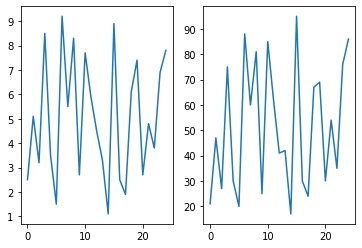

In [43]:
#plotting the extracted information

plt.figure(1)
plt.subplot(1,2,1)
hours.plot()
plt.subplot(1,2,2)
scores.plot()

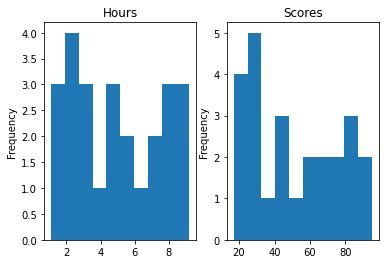

In [56]:
#plotting the frequencies extracted information for EDA

plt.figure(2)
plt.subplot(1,2,1)
hours.plot(kind='hist', title="Hours")
plt.subplot(1,2,2)
scores.plot(kind='hist', title="Scores")

In [69]:
fig = px.scatter(in_data, x='Hours', y='Scores')
fig.show()

In [75]:
inputs = in_data.drop(columns=['Scores'], axis = 1, inplace = False)
targets = in_data.drop(columns=['Hours'], axis= 1, inplace = False)
train_inputs, test_inputs, train_targets, test_targets = train_test_split(inputs, targets, test_size=0.2, random_state=42)

In [76]:
train_inputs

,Hours
9,2.7
13,3.3
1,5.1
22,3.8
5,1.5
2,3.2
12,4.5
15,8.9
3,8.5
4,3.5


In [77]:
train_targets

,Scores
9,25
13,42
1,47
22,35
5,20
2,27
12,41
15,95
3,75
4,30


In [78]:
lin_reg_model = LinearRegression()

In [79]:
#check if shapes are ok

print(train_inputs.shape)
print(train_targets.shape)

(20, 1)
(20, 1)


In [80]:
#fitting the model

lin_reg_model.fit(train_inputs, train_targets)

LinearRegression()

In [82]:
#compute predictions for the entire dataset

train_predictions = lin_reg_model.predict(train_inputs)
train_predictions

array([[28.96850337],
       [34.77775026],
       [52.20549094],
       [39.61878934],
       [17.35000959],
       [33.80954245],
       [46.39624405],
       [88.99738793],
       [85.12455667],
       [36.71416589],
       [28.96850337],
       [21.22284085],
       [49.3008675 ],
       [61.8875691 ],
       [78.34710196],
       [56.0783222 ],
       [77.37889414],
       [13.47717832],
       [74.4742707 ],
       [91.90201137]])

Text(0, 0.5, 'Scores')

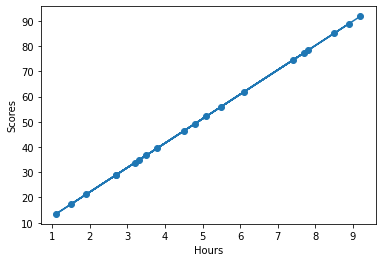

In [84]:
#plotting the predicted scores

plt.plot(train_inputs, train_predictions, '-o')
plt.xlabel('Hours')
plt.ylabel('Scores')

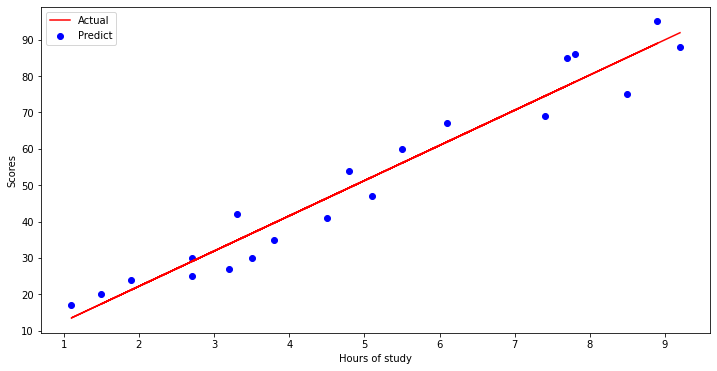

In [91]:
#overlay the model line over the actual data

plt.figure(figsize=(12,6))
plt.scatter(train_inputs, train_targets, color = 'blue')
plt.plot(train_inputs, train_predictions, color = 'red')
plt.xlabel('Hours of study')
plt.ylabel('Scores')
plt.legend(['Actual', 'Predict'])

In [89]:
#computing Accuracy and root-mean-square-error

score = lin_reg_model.score(train_inputs, train_targets)
print("The model's Accuracy is: ", round(score*100, 2))
print("The model's RMSE is: ", round(np.sqrt(mean_squared_error(train_targets,train_predictions)), 2))

The model's Accuracy is:  94.91
The model's RMSE is:  5.61


In [90]:
#model evaluation via test predictions

test_predictions = lin_reg_model.predict(test_inputs)

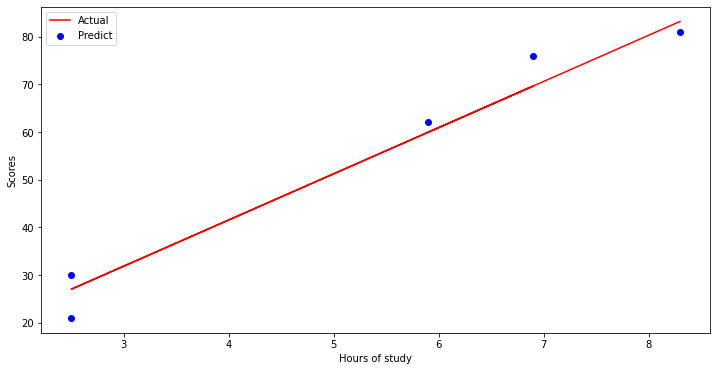

In [92]:
plt.figure(figsize=(12,6))
plt.scatter(test_inputs, test_targets, color = "blue")
plt.plot(test_inputs, test_predictions, color = "red")
plt.xlabel("Hours of study")
plt.ylabel("Scores" )
plt.legend(["Actual", "Predict"])

In [93]:
#computing Accuracy and root-mean-square-error

score = lin_reg_model.score(test_inputs, test_targets)
print("The model's Accuracy is: ", round(score*100, 2))
print("The model's RMSE is: ", round(np.sqrt(mean_squared_error(test_targets,test_predictions)), 2))

The model's Accuracy is:  96.78
The model's RMSE is:  4.35


In [100]:
#make certain predictions

print("The score of a student who studies 10 hours a day will be", lin_reg_model.predict([[10]]))
print("The score of a student who studied 2 hours a day will be", lin_reg_model.predict([[2]]))

The score of a student who studies 10 hours a day will be [[99.6476739]]
The score of a student who studied 2 hours a day will be [[22.19104866]]


In [101]:
#Conclusions

#As per our exploratory data analysis it appears that an increase in the number
#of hours studied will lead to an increase in score almost linearly.

#The scores of out linear model are satisfactory.

#As per our linear model, it can be predicted that 10 hours of study per day
#may lead to near-perfect score.